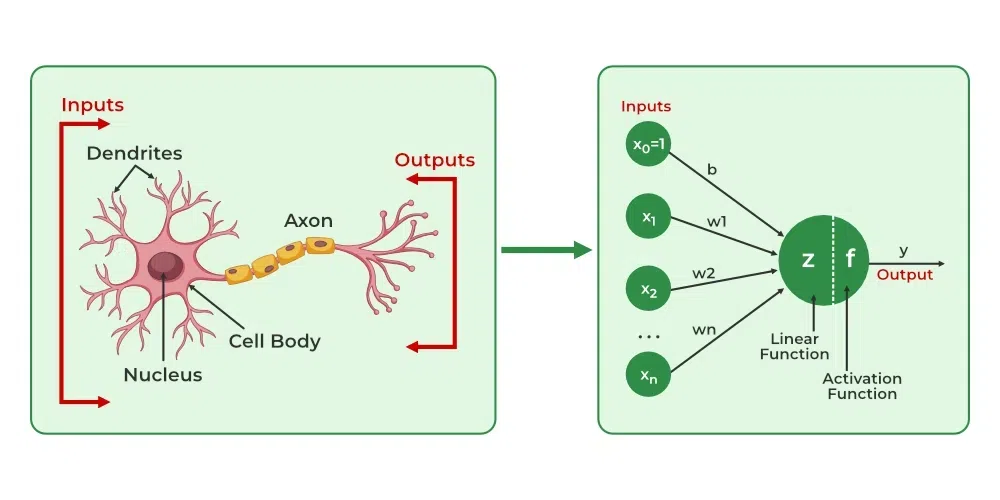

# Introduction of Regression with Nueral Networks in TensorFlow

There are many definitions of Regression problem, but in our case, we are going to simplify it: predicting a numerical variable based on soeme other combinations of variables, even shorter....predicting a number


In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Creating some data to view and fit

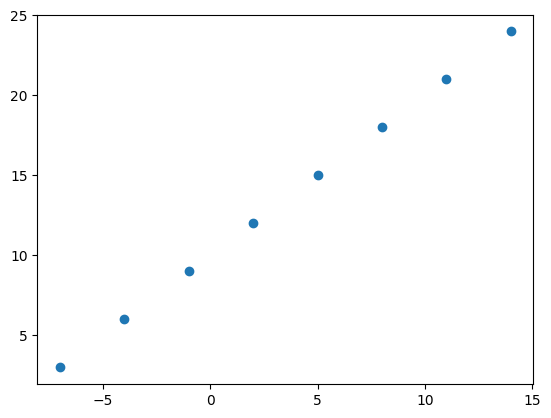

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizae it
plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0], X[0].shape, y[0].shape   # rank 0 scaler

(np.float64(-7.0), np.float64(3.0), (), ())

In [ ]:
X[0].ndim, y[0].ndim

(0, 0)

In [ ]:
# Turn our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with TensorFlow

1. **Creating the model** - define the input and output layers as well as the hidden layers of the nueral networks of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function that tells the model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrices (what we can use to intepret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X and y
(features and labels)

--------------------------------------------------------------------------------
> **Common ways to improve deep learning model**
- Adding layers
- Increase the number of hidden units
- Change the activation function
- Change tje optimization fucntion
- Change the learning rate
- Fitting on more data
- Fitting for longer


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)
     ])

# 2. Compile te model
model.compile(
       loss = tf.keras.losses.mae,       # mae: mean absolute error = mean(abs(y_true - y_pred), axis =-1)
       optimizer = tf.keras.optimizers.SGD(),  # SGD: stochastic gradient descent
       metrics = ['mae']
       )

# Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - loss: 12.9264 - mae: 12.9264
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.7939 - mae: 12.7939
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 12.6614 - mae: 12.6614
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.5289 - mae: 12.5289
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.3964 - mae: 12.3964


Model's Expected Input Shape: The Keras Dense layer, which is the first layer in the sequential model, expects the input data to have a specific dimensionality. It's designed to receive a batch of input samples, where each sample has a defined number of features. For a simple model with one input feature per sample, the Dense layer expects an input shape of (batch_size, input_features).

In this case, even though we have only one feature for each sample, the model still expects the data to be structured in this two-dimensional way. The initial shape of X (8,) is interpreted as a single sample with 8 features. However, the correct interpretation should be 8 distinct samples, each with 1 feature.

By using tf.expand_dims(X, axis=-1), the shape of X is changed from (8,) to (8, 1). This new shape correctly represents the data as a batch of 8 samples, where each sample is an array containing a single feature. This matches the input shape that the Dense layer is expecting.

In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

# A neural network starts with random internal parameters (weights and biases)
# and gradually adjusts them during training to minimize the error between its predictions and the true y values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[5.81115]], dtype=float32)

## Improving our model

We can improve our model by altering the steps to create a model

1. **Creating a model** - here we might add more layers, increase the number f hidden units (neurons) within each of the hidden layers, change the activation functions of each layer
2. **Compiling a model** - here we might change the optimization functions or perhaps the **learning rate** of a optimization function
3. **Fitting a model** - here we might fit a model with more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuilt our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
      optimizer = tf.keras.optimizers.SGD(),
      metrics = ['mae']
)

# Fit thhe model (This time we wil train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0)

In [ ]:
# Remind ourselves with the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has been improved by using more epochs
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[30.221088]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve the model

# 1. Create a model (this tme with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
 tf.keras.layers.Dense(100, activation = "relu"),
 tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
       optimizer = tf.keras.optimizers.SGD(),
       metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0)

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict(np.array([17.0]))

# The model is overfitting eventhough the mae is smaller, the prediction is worse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[31.947283]], dtype=float32)

In [ ]:
# Let's try to change the optimizer from SGD() to Adam

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0)

# Let's make prediction
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[19.738605]], dtype=float32)

In [ ]:
# Let's try to change the learning rate of optimizer

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

# Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100, verbose = 0)

# Let's make prediction
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[26.072077]], dtype=float32)

So far, by changing the leaning_rate of optimizer "Adam" from default 0.001 to 0.01, the model has been improved (usually, ;earning rate has the largest effect on model performance)

## Evaluating a model

In pracitce, a typical workflow you'll go through when building neural networks is:

build a model -> fit it -> evaluate it -> tweek a model -> fit it ->evaluate it -> tweek a model ->  fit it -> evaluate it......

When it comes to evaluation, there are three words we should memorize

> "Visualize, visualize and visualize"

It's a good idea to visualize:
* data - what data are we working with, what does it look like ?
* The model itself - what does our model look like ?
* The training of a model - how deos a model perform while it is learning ?
* The predictions of a model - how do a prediction of a model line up against the goround truth (the original labels) ?  

In [ ]:
# Make a bigegr dataset
X = tf.range(-100, 100, 4)     # range(start_value, end_vale, step_value)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

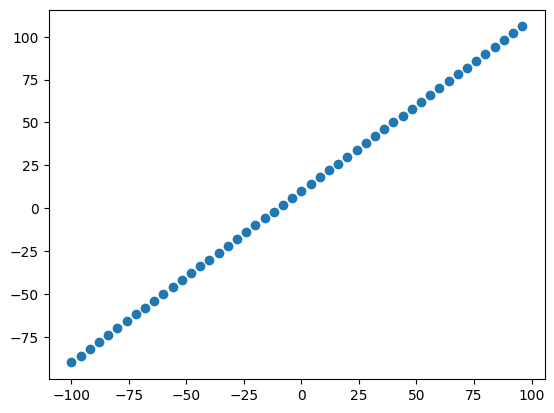

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

### The 3 sets...

* **Training set** - the nodel learns from this data, typically 70-80 percent of the total data available
* **Validation set** - the modle gets tuned on this data, whixh is typically 10-15 percent of the data available
* **Test set** - model gets evaluated from this data to test what it has learned, this set is typically 10-15 percent of the total data available

In [ ]:
# Check the lenght of how many samples we have
len(X)

50

In [ ]:
# Split te data to training and test set
X_train = X[:40]  # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]  # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

X_train.dtype, y_train.dtype

X_train = tf.cast(X_train, dtype = tf.float32)
y_train = tf.cast(y_train, dtype = tf.float32)
X_test = tf.cast(X_test, dtype = tf.float32)
y_test = tf.cast(y_test, dtype = tf.float32)

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

### Visualize the data

Now we have our data in training and test set, lets visualize it again

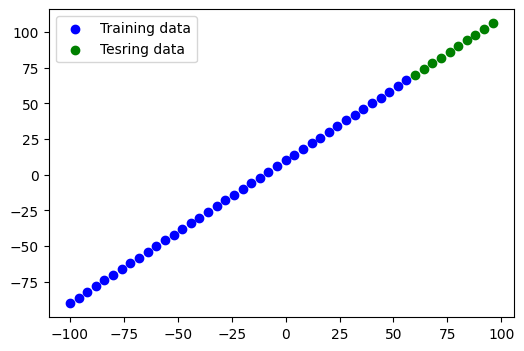

In [ ]:
plt.figure(figsize=(6,4))
# plot training data in blue
plt.scatter(X_train, y_train, c = 'b', label = "Training data")
# plot test data in green
plt.scatter(X_test, y_test, c = 'g', label = "Tesring data")
# Show a legend
plt.legend();


In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
     tf.keras.layers.Dense(1)

])

# 2.Compile a model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']

)

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="hidden_layer"),
  tf.keras.layers.Dense(1, name="output_layer") # Add an output layer with 1 unit
], name = "Model_for_practice_1")

# 2. Compile the model (same as above)
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "Model_for_practice_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training, (this ism typcal when you bring in already learned patterns or parameters from other models during **transfer learning**)

> **Resources** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video. https://www.youtube.com/watch?v=ErnWZxJovaM

> **Excercise:** Try playing around with the number of he hidden unit in the dense layer, see how that affect the number of paremeters (total and trainable) bt calling "model.summary()"

> By adding the total number of weights and the total number of biases together, you get the total number of learnable parameters for the layer.

> **Total Parameters = (Number of Input Features × Number of Neurons) + (Number of Neurons)**

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

verbose = 0 (silence mode),  = 1(progress bar), =2(one line per epoch)

In [ ]:
# Get a summary of our model
model.summary()

Model: "Model_for_practice_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

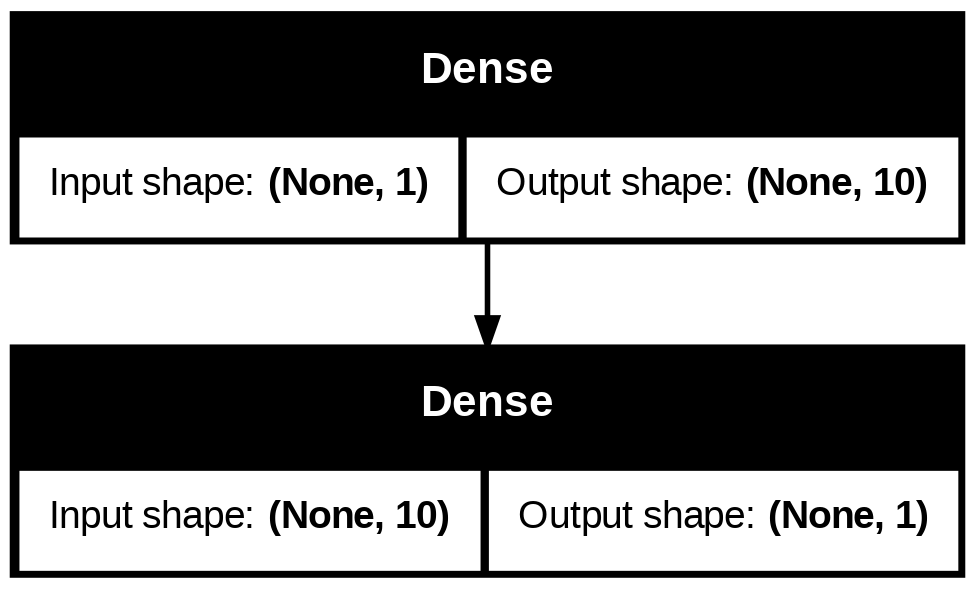

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

In [ ]:
tf.__version__

'2.18.0'

###Visualizing our model's predictions

To visualize predictions, its a good idea to plot them agianst the ground truth labels

Often we wil  see this in the form of "y_test" ir "y_true" versus 'y_pred' (grund truth versus model's predictions)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[39.535133],
       [42.062187],
       [44.58925 ],
       [47.11631 ],
       [49.643368],
       [52.170425],
       [54.697487],
       [57.22455 ],
       [59.751602],
       [62.278664]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

**Note:** If you want to reuse some kind of functionality in the future, its a good idea to turn it into a function

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
           train_labels = y_train,
           test_data = X_test,
           test_labels = y_test,
           predictions = y_pred):

  """ Plots training data, test data and compare predictions to ground truth labels """

  plt.figure(figsize = (8,6))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = "Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c = 'g', label = "Test data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")
  # Show the legend
  plt.legend()
  plt.show()

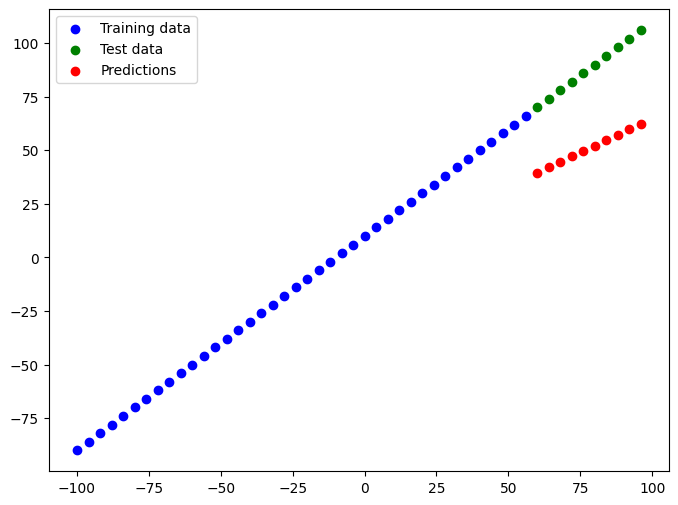

In [ ]:
plot_predictions(train_data = X_train,
           train_labels = y_train,
           test_data = X_test,
           test_labels = y_test,
           predictions = y_pred)

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem working on, there will be different evaluation metrics to evaluate the model's performance

Since we are working on a regression problem, two of the main metrics:
* MAE: mean absolute error: "on average how wrong is the model's prediction"
* MSE: mean squared error: "sqaure the average errors"

Use cases:
* MAE: Great starter for regression
* MSE: When larger errors are more significant than smalller errors


In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)
# because we deine the loss and metric as mae, the result of this evaluation will be the same

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - loss: 37.0931 - mae: 37.0931


[37.093101501464844, 37.093101501464844]

In [ ]:
y_pred, y_test    # they are in different shape and in array

(array([[39.535133],
        [42.062187],
        [44.58925 ],
        [47.11631 ],
        [49.643368],
        [52.170425],
        [54.697487],
        [57.22455 ],
        [59.751602],
        [62.278664]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [ ]:
# Calculate the mean absolute error
tf.keras.losses.mae(y_true=y_test, y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([30.464867, 31.937813, 33.41075 , 34.88369 , 36.356632, 37.829575,
       39.302513, 40.77545 , 42.248398, 43.721336], dtype=float32)>

In [ ]:
# reshape y_pred and y_test
y_pred = tf.constant(y_pred)
y_test = tf.constant(y_test)
y_pred, y_test                  # y_pred: shape = (10,1), y_test:shape = (10,)
y_pred - tf.expand_dims(y_test, axis = -1)  # tensors need to be in same shape for tensor calculation (use tf.expand_dims method)
y_pred - tf.reshape(y_test, shape = (10,1))  # or we can use tf.reshape method
tf.squeeze(y_pred) - y_test           # or we can use tf.squeeze method to change the shape of y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-30.464867, -31.937813, -33.41075 , -34.88369 , -36.356632,
       -37.829575, -39.302513, -40.77545 , -42.248398, -43.721336],
      dtype=float32)>

* When you calculate metrics like MAE (Mean Absolute Error) or MSE (Mean Squared Error), you are performing element-wise operations: (y_true[i]−y_pred[i]) for each data point i.

* For these element-wise operations to work correctly, the tensors must have compatible shapes (often, they need to be identical).

* By applying tf.squeeze(y_pred_1), you are transforming y_pred_1 from a (10,1) shape to a (10,) shape, making its shape identical to y_test

In [ ]:
# Calculate the mean absolute error
tf.keras.losses.mae(y_true=y_test, y_pred=tf.squeeze(y_pred))      # mae requires tensor to be diemnsion = 1

<tf.Tensor: shape=(), dtype=float32, numpy=37.093101501464844>

In [ ]:
# Calculate the mean square error
tf.keras.losses.mse(y_true = y_test, y_pred = tf.squeeze(y_pred))  # mae requires tensor to be diemnsion = 1

<tf.Tensor: shape=(), dtype=float32, numpy=1393.797119140625>

In [ ]:
# Calculate the Huber
tf.keras.losses.huber(y_true = y_test, y_pred = tf.squeeze(y_pred)) # mae requires tensor to be diemnsion = 1

<tf.Tensor: shape=(), dtype=float32, numpy=36.593101501464844>

Huber: https://www.tensorflow.org/api_docs/python/tf/keras/losses/Huber

In [ ]:
# Make a function to reuse MAE and MSE
def calculate_mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true=y_true, y_pred = tf.squeeze(y_pred))

def calculate_mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true=y_true, y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model

> Build a model -> fit it -> evaluate it -> tweak it -> ....

1. Get more data - get more examples to train the model (more opportunities to learn patterns and relationships) between features and labels)
2. Make a model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more chance to find patterns in the data

> **Let's do tree modeling experiments:**
1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers, trained for 500 epochs
4. ...
5. ...

> **Build model_1**


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential({
      tf.keras.layers.Dense(1),
})

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']

)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


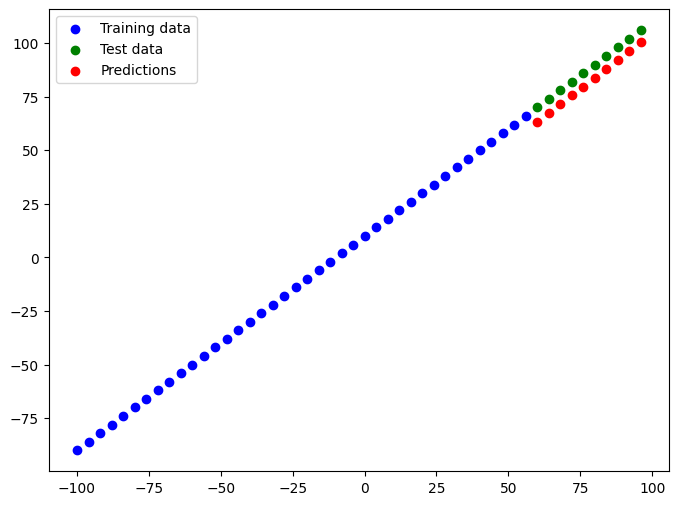

In [ ]:
# Make a plot prediction for model_1
y_pred_1 = model_1.predict(X_test)

# plot the prediction
plot_predictions(train_data = X_train,
           train_labels = y_train,
           test_data = X_test,
           test_labels = y_test,
           predictions = y_pred_1)

In [ ]:
# Create model_1 evaluation metrics
# y_test: shape = (10,) y_pred: shape = (10,1)
# y_test = tf.constant(y_test)
# y_pred_1 = tf.constant(y_pred_1)
# y_test, y_pred_1

# calculate mae and mse using predefined functions
mae_1 = calculate_mae(y_test, y_pred_1)
mse_1 = calculate_mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.208957195281982>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.673316955566406>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential({
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
})

# 2. Compile the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose=0)

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/mean_absolute_error/sub defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipython-input-75-3602676239.py", line 18, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 1716, in mean_absolute_error

Incompatible shapes: [32] vs. [32,10]
	 [[{{node compile_loss/mean_absolute_error/sub}}]] [Op:__inference_multi_step_on_iterator_102028]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


ValueError: x and y must be the same size

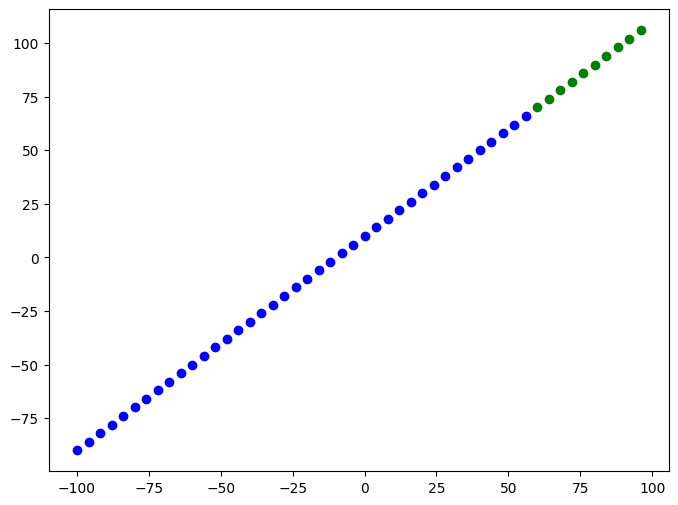

In [ ]:
# Make a plot prediction for model_2
y_pred_2 = model_2.predict(X_test)

# plot the prediction
plot_predictions(train_data = X_train,
           train_labels = y_train,
           test_data = X_test,
           test_labels = y_test,
           predictions = y_pred_2)

In [ ]:
# calculate mae and mse using predefined functions
mae_2 = calculate_mae(y_test, y_pred_2)
mse_2 = calculate_mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([91.34906 , 91.57233 , 91.7956  , 92.018875, 92.24214 , 92.465416,
        92.68868 , 92.91195 , 93.13522 , 93.3585  ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8541.13 , 8604.029, 8669.248, 8736.787, 8806.646, 8878.823,
        8953.322, 9030.14 , 9109.277, 9190.734], dtype=float32)>)

With such a small and simple dataset, the more complex model (model_2) is prone to overfitting. It tries to find complex relationships that aren't really there, leading to worse performance when evaluated on the test data it has never seen before. The simpler model (model_1) is less flexible but correctly identifies the linear trend, resulting in a lower error.

**Build model_3**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a moedl
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


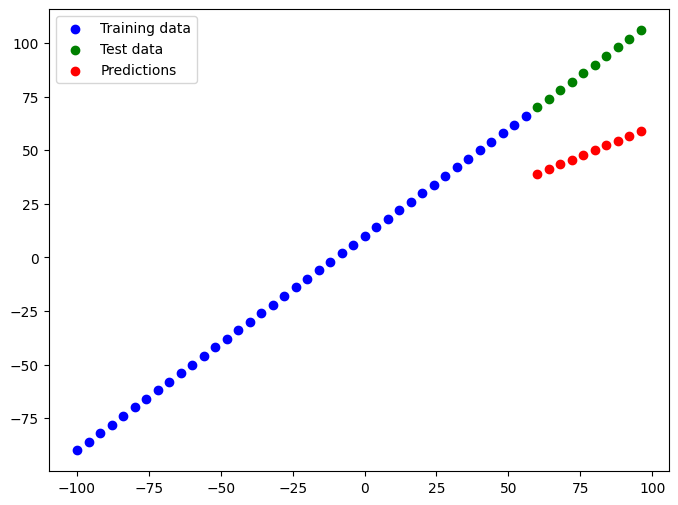

In [ ]:
# Make a plot prediction for model_2
y_pred_3 = model_3.predict(X_test)

# plot the prediction
plot_predictions(train_data = X_train,
           train_labels = y_train,
           test_data = X_test,
           test_labels = y_test,
           predictions = y_pred_3)

In [ ]:
# calculate mae and mse using predefined functions
mae_3 = calculate_mae(y_test, y_pred_3)
mse_3 = calculate_mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=39.033416748046875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1550.5628662109375>)

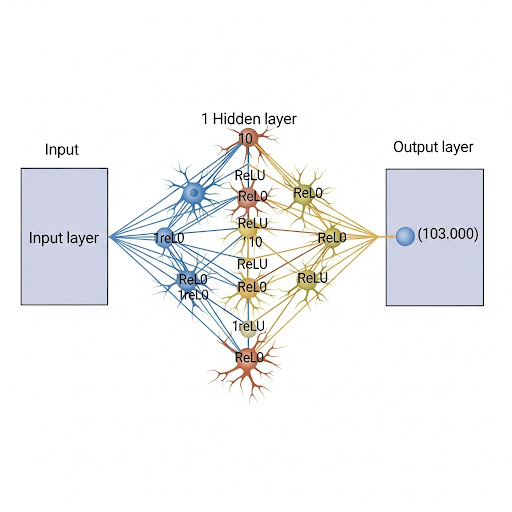

**Note:** You want to start with small experiments (small models) to make sure they work and then increase their scale when necessary

### Comparing the result of our experiements

We've run a few experiment, let's compare the results

In [ ]:
# Let's compare our model's results using a pands DataFrame
import pandas as pd
model_results = {
          "MAE": {"model_1":mae_1.numpy(), "model_2":mae_2.numpy(), "model_3":mae_3.numpy()},
          "MSE": {"model_1":mse_1.numpy(), "model_2":mse_2.numpy(), "model_3":mse_3.numpy()}
         }

pd.DataFrame(model_results)

,MAE,MSE
model_1,6.208957,38.673317
model_2,"[91.34906, 91.57233, 91.7956, 92.018875, 92.24...","[8541.13, 8604.029, 8669.248, 8736.787, 8806.6..."
model_3,39.033417,1550.562866


Looks like model_1 perform the bset

In [ ]:
model_1.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Note:** One of the main goal should be to minimize the time between the experiments, the more experiment performed, the more information we will figure out which don't work and in turn, get closer to figure out what does work. Remember the machine learning practictioner motto: "experiment, experiment, experiment""

## Tracking your experiments

One really good habit in machine learning modeling is to track the result of your experiments

And when doing so, it can be tedious if you are running lots of experiments

Luckily, there are tools to help us

**Resources:** As you build more models you will want to look into using:

* **Tensorboard** - a component of the TensorFlow library t0 help track modeling experiement (we will see this one later) https://www.tensorflow.org/tensorboard?hl=zh-tw
* **Weight & Biases** - a tool for tracking all kinds of machine learning experiments (plug stright into TensorBoard) https://wandb.ai/site/


## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they are trained) such as in the web application, or a mobile app.

There are 2 main formats we can save our model:
1. The SaveModel format
2. The HDF5 format


https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
# Save model using SaveModel format
model_1.save("best_model_SaveModel_format.keras")

# Alternatively, save in HDF5 format
model_1.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Loading the SavedModel format model
loaded_SaveModel_format = tf.keras.models.load_model("/content/best_model_SaveModel_format.keras")
loaded_SaveModel_format.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_1.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Compare model_1 predictions with SaveModel format model predictions
model_1_preds = model_1.predict(X_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)

model_1_preds == loaded_SaveModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading the HDF5 (.h5) format model
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Compare model_1 predictions with .h5 format model predictions
model_1_preds = model_1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_1_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download the model form Google colab

If you want to download the model form Google colab

1. You can go to the "files" on the left anel and download
2. Use code (see the cells below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see second code cell below)

In [ ]:
# Download the file from Google colab
from google.colab import files
files.download("/content/best_model_SaveModel_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## A larger example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

In [ ]:
# Import the required library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read in insurance dataset
# Go to github of dataset, go to "Raw" and copy the link
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# use pandas.get_dummies() for one-hot encoding object datatype features
# Let's try one-hot encode our dataframe so its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Turn boolean (True and False) into int dtype
insurance_one_hot = insurance_one_hot.astype(int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [ ]:
# view y
y.head()

,charges
0,16884
1,1725
2,4449
3,21984
4,3866


In [ ]:
# Create training (X) and test sets (y)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Create a neural network

# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential({
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
})

# 2. Compile the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs = 100, verbose = 0)

We do not have to convert dataframe (large numpy array) into tensors since tensorflow handles numpy arrays properly

In [ ]:
# Check the result of insuarance_model on test data
insurance_model.evaluate(X_test, y_test)

# retuen a loss value (losses = mae) and a metric value (metric = mae) of the model

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7857.1685 - mae: 7857.1685  


[7811.35546875, 7811.35546875]

In [ ]:
y_train.median(), y_train.mean()    # the model's performance is poor at first training

(9574.5, np.float64(13345.596261682243))

The model is not performing well, let's try to improve it

To try to improve the model, we will run 2 experiments
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer (200 epochs)
3. Insert yourown experiment here

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5108.1943 - mae: 5108.1943  


[4955.30517578125, 4955.30517578125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7857.1685 - mae: 7857.1685 


[7811.35546875, 7811.35546875]

In [ ]:
# Improve with longer training
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200, verbose = 0)

In [ ]:
# Evaluate the larger model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3454.3076 - mae: 3454.3076  


[3389.290771484375, 3389.290771484375]

In [ ]:
# compare to model_2
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5108.1943 - mae: 5108.1943 


[4955.30517578125, 4955.30517578125]

Text(0.5, 0, 'eposchs')

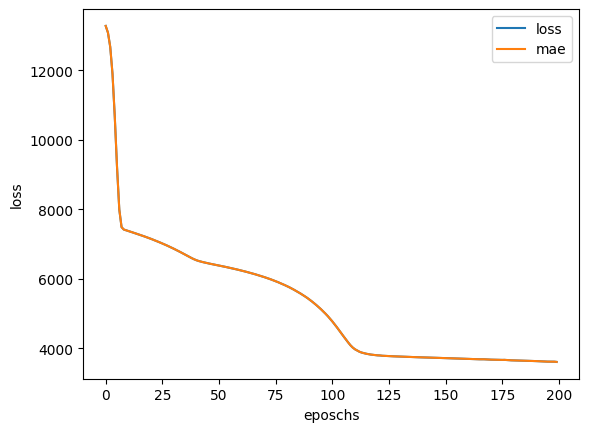

In [ ]:
# Plot history (also known as loss curve or training curve)
# To visualize the change of loss during training
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("eposchs")

**Question:** how long should the model be trained for ?

> It depends on the problem you are working on, jowever, many people have asked this question before, so TensorFlow has a solution, it's called **EarlyStopping Callback**, which is a tensorflow component which you can add to your model to stops training once it stops improving a certain metric  https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

## Preprocessing data (normalization ad standardization)

In terms of scaling values, neural networks tend to prefer normalization

If you are not sure on which to use, you could try both and see which performs better

https://medium.com/data-science/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [ ]:
X.head()  # age and bmi are at different scale (not normalized)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


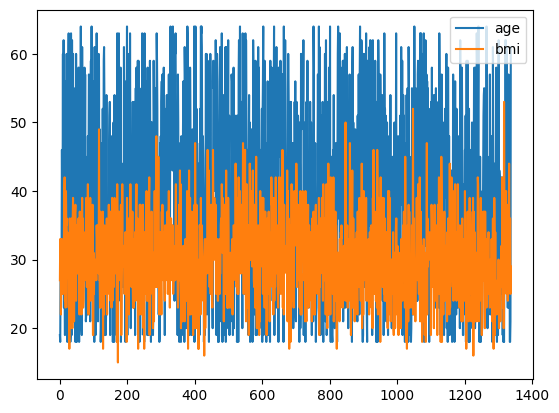

In [ ]:
# age and bmi are at different scale (not normalized)
X["age"].plot(), X["bmi"].plot()
plt.legend()

Sklearn scalers:
1. MinMaxScaler(): default scaler for neural network
2. StandardScaler()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow a few classes from scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),                # turn all values in these columsn between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])  #
)

# Create X and y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler(), OneHotEncoder())
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

The correction is: **"Fit" for a model** (like a classifier or regressor) is indeed performed after the data is normalized or standardized by a transformer.

However, **"Fit" for a transformer** itself is the process of learning how to normalize or standardize the data.

So:

* Transformer: transformer.fit(data_to_learn_from) -> transformer.transform(data_to_apply_to)

* Model: model.fit(transformed_data, target)

In [ ]:
# What does our data looks like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]
# its all in numerical format after transformation

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape    # extra columns in transformed data is due to OneHotEncoding

((1070, 6), (1070, 11))

Our data has been normalized and onehot-encoded, now let's build a neural network modelon it

In [ ]:
# Build a neural network model to fit on our normalized data

# set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs = 100, verbose = 0)

In [ ]:
# 4. Evaluate the model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3513.0579 - mae: 3513.0579  


[3427.652587890625, 3427.652587890625]

In [ ]:
# Compare to insurance_model_2 which is trained on un-normalized data
insurance_model_2.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16126.8193 - mae: 16126.8193


[15741.44921875, 15741.44921875]

mae is significantly reduced by normalizing the training data

Excercise -

Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

Try and improve the results we got on the insurance dataset, some things you might want to try include:

Building a larger model (how does one with 4 dense layers go?).
Increasing the number of units in each layer.

Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?

What happens if you train for longer (say 300 epochs instead of 200)?

Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.